# Anamoly Detection in Network Traffic Using Isolation forest Model

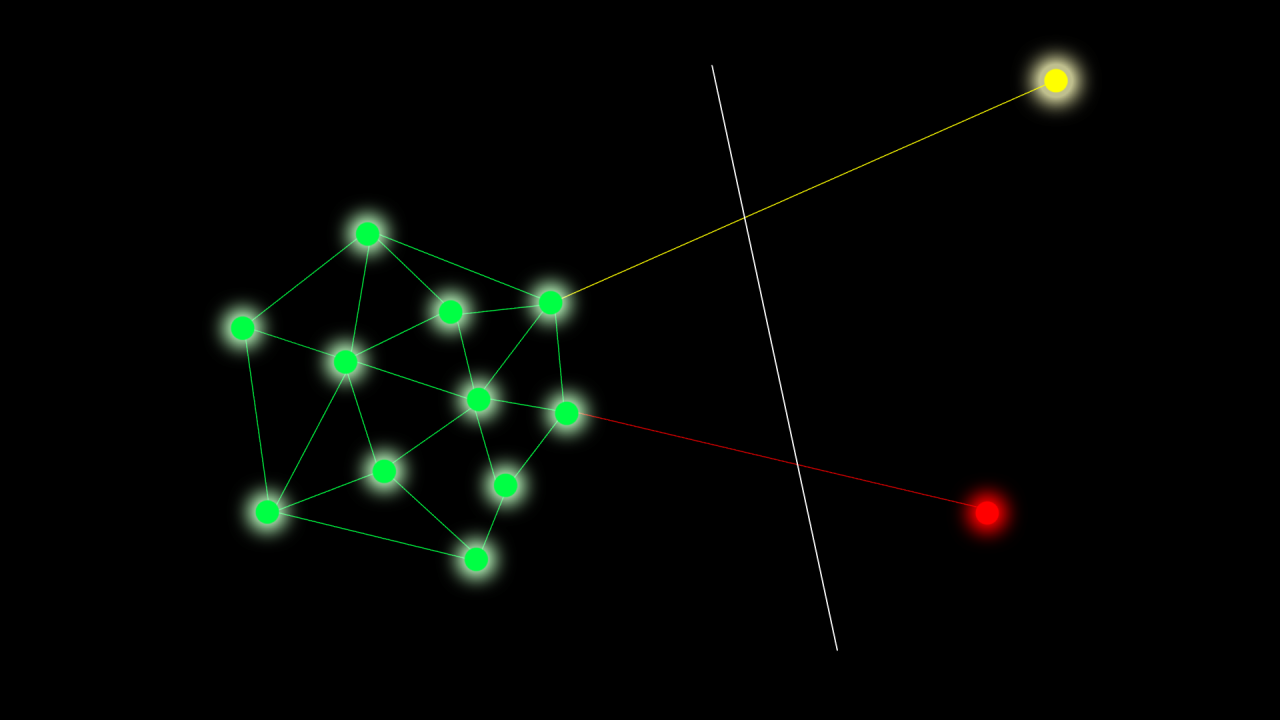


Name: Abdul Wadood Asim

Email: abdulwadoodasim456@gmail.com

LinkInn: www.linkedin.com/in/abdul-wadood-asim

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix



In [3]:
df= pd.read_csv('/content/CloudWatch_Traffic_Web_Attack.csv')
df.head(3)

bytes_in  bytes_out         creation_time              end_time  \
0      5602      12990  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
1     30912      18186  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
2     28506      13468  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   

            src_ip src_ip_country_code protocol  response.code  dst_port  \
0   147.161.161.82                  AE    HTTPS            200       443   
1     165.225.33.6                  US    HTTPS            200       443   
2  165.225.212.255                  CA    HTTPS            200       443   

         dst_ip              rule_names                      observation_name  \
0  10.138.69.97  Suspicious Web Traffic  Adversary Infrastructure Interaction   
1  10.138.69.97  Suspicious Web Traffic  Adversary Infrastructure Interaction   
2  10.138.69.97  Suspicious Web Traffic  Adversary Infrastructure Interaction   

    source.meta     source.name                  time detection_types  
0  AWS_VPC_Flow  prod_webserver  2024-04-25T23:00:00Z        waf_rule  
1  AWS_VPC_Flow  prod_webserver  2024-04-25T23:00:00Z        waf_rule  
2  AWS_VPC_Flow  prod_webserver  2024-04-25T23:00:00Z        waf_rule

## Understanding Data

In [12]:
df.shape

(282, 16)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

In [31]:
df.describe()

bytes_in     bytes_out  response.code  dst_port
count  2.820000e+02  2.820000e+02          282.0     282.0
mean   1.199390e+06  8.455429e+04          200.0     443.0
std    4.149312e+06  2.549279e+05            0.0       0.0
min    4.000000e+01  4.400000e+01          200.0     443.0
25%    5.381500e+03  1.114200e+04          200.0     443.0
50%    1.318200e+04  1.379950e+04          200.0     443.0
75%    3.083300e+04  2.627950e+04          200.0     443.0
max    2.520779e+07  1.561220e+06          200.0     443.0

Finally, we drop the unnecessary columns

In [26]:
df.drop(['creation_time','end_time', 'time'], axis=1, inplace=True)
df.head()

bytes_in  bytes_out           src_ip src_ip_country_code protocol  \
0      5602      12990   147.161.161.82                  AE    HTTPS   
1     30912      18186     165.225.33.6                  US    HTTPS   
2     28506      13468  165.225.212.255                  CA    HTTPS   
3     30546      14278   136.226.64.114                  US    HTTPS   
4      6526      13892   165.225.240.79                  NL    HTTPS   

   response.code  dst_port        dst_ip              rule_names  \
0            200       443  10.138.69.97  Suspicious Web Traffic   
1            200       443  10.138.69.97  Suspicious Web Traffic   
2            200       443  10.138.69.97  Suspicious Web Traffic   
3            200       443  10.138.69.97  Suspicious Web Traffic   
4            200       443  10.138.69.97  Suspicious Web Traffic   

                       observation_name   source.meta     source.name  \
0  Adversary Infrastructure Interaction  AWS_VPC_Flow  prod_webserver   
1  Adversary Infrastructure Interaction  AWS_VPC_Flow  prod_webserver   
2  Adversary Infrastructure Interaction  AWS_VPC_Flow  prod_webserver   
3  Adversary Infrastructure Interaction  AWS_VPC_Flow  prod_webserver   
4  Adversary Infrastructure Interaction  AWS_VPC_Flow  prod_webserver   

  detection_types  
0        waf_rule  
1        waf_rule  
2        waf_rule  
3        waf_rule  
4        waf_rule

## Visualization

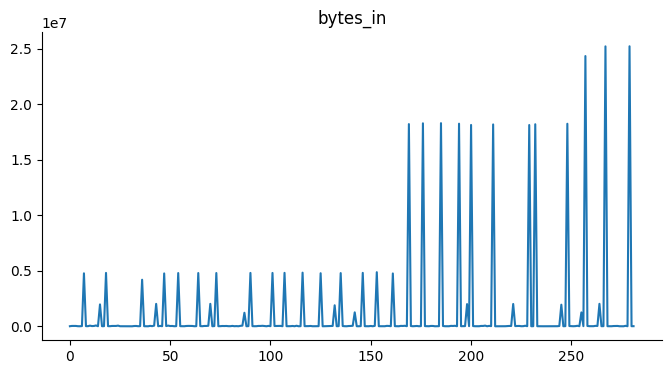

In [24]:
from matplotlib import pyplot as plt
df['bytes_in'].plot(kind='line', figsize=(8, 4), title='bytes_in')
plt.gca().spines[['top', 'right']].set_visible(False)

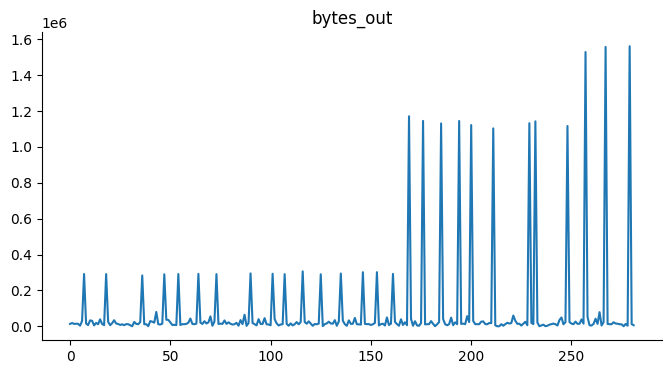

In [25]:
from matplotlib import pyplot as plt
df['bytes_out'].plot(kind='line', figsize=(8, 4), title='bytes_out')
plt.gca().spines[['top', 'right']].set_visible(False)

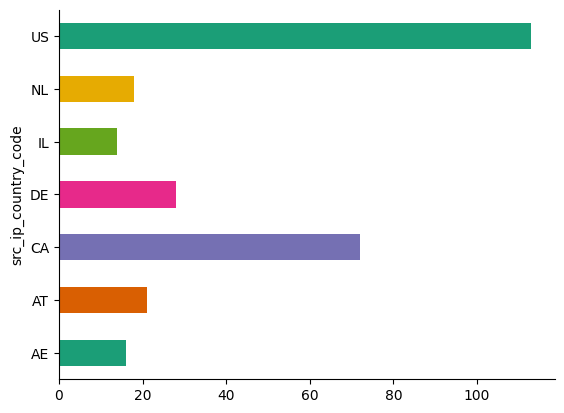

In [29]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('src_ip_country_code').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Histogram

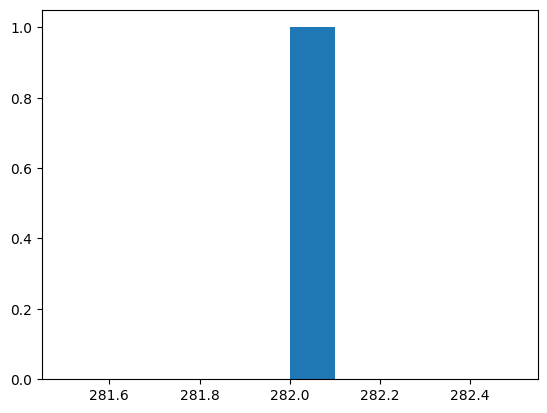

In [28]:
plt.figure()
x = df['protocol'].value_counts()
plt.hist(x)  # Changed 'Hist' to 'hist'
plt.show()

# Preparing Dataset for IsolationForest Model

# Label Encoding

In [34]:
df.head(2)

bytes_in  bytes_out  src_ip src_ip_country_code protocol  response.code  \
0      5602      12990       5                  AE    HTTPS            200   
1     30912      18186      12                  US    HTTPS            200   

   dst_port        dst_ip              rule_names  \
0       443  10.138.69.97  Suspicious Web Traffic   
1       443  10.138.69.97  Suspicious Web Traffic   

                       observation_name   source.meta     source.name  \
0  Adversary Infrastructure Interaction  AWS_VPC_Flow  prod_webserver   
1  Adversary Infrastructure Interaction  AWS_VPC_Flow  prod_webserver   

  detection_types  
0        waf_rule  
1        waf_rule

In [36]:
cat_columns = ['src_ip', 'dst_ip', 'dst_port','src_ip_country_code', 'protocol', 'rule_names', 'observation_name',	'source.meta',	'source.name',	'detection_types' ]
for col in cat_columns:
    Lbe = LabelEncoder()
    df[col] = Lbe.fit_transform(df[col])
df.head()

bytes_in  bytes_out  src_ip  src_ip_country_code  protocol  response.code  \
0      5602      12990       5                    0         0            200   
1     30912      18186      12                    6         0            200   
2     28506      13468       8                    2         0            200   
3     30546      14278       0                    6         0            200   
4      6526      13892      10                    5         0            200   

   dst_port  dst_ip  rule_names  observation_name  source.meta  source.name  \
0         0       0           0                 0            0            0   
1         0       0           0                 0            0            0   
2         0       0           0                 0            0            0   
3         0       0           0                 0            0            0   
4         0       0           0                 0            0            0   

   detection_types  
0                0  
1                0  
2                0  
3                0  
4                0

In [46]:
# Assuming 'df' is your DataFrame and you want to scale all numerical columns

# Select numerical columns
numerical_cols = df.select_dtypes(include=['float', 'int']).columns

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Print the first few rows of the scaled DataFrame
print(df.head())

   bytes_in  bytes_out    src_ip  src_ip_country_code  protocol  \
0 -0.288219  -0.281223 -0.452528            -1.829139       0.0   
1 -0.282108  -0.260804  0.636851             1.055207       0.0   
2 -0.282689  -0.279344  0.014348            -0.867690       0.0   
3 -0.282197  -0.276161 -1.230656             1.055207       0.0   
4 -0.287996  -0.277678  0.325600             0.574483       0.0   

   response.code  dst_port  dst_ip  rule_names  observation_name  source.meta  \
0            0.0       0.0     0.0         0.0               0.0          0.0   
1            0.0       0.0     0.0         0.0               0.0          0.0   
2            0.0       0.0     0.0         0.0               0.0          0.0   
3            0.0       0.0     0.0         0.0               0.0          0.0   
4            0.0       0.0     0.0         0.0               0.0          0.0   

   source.name  detection_types  
0          0.0              0.0  
1          0.0              0.0  
2       

In [62]:
x_train, x_test = train_test_split(df, test_size=0.2, random_state=42)

In [63]:
model = IsolationForest(contamination=0.05)
model.fit(x_train)
y_pred = model.predict(x_test)
new_y_pred = []
for x in y_pred:
    if x == 1:
        new_y_pred.append(1)
    else:
        new_y_pred.append(0)

y_pred = new_y_pred

In [65]:
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs

In [64]:
y_pred

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [58]:
 cm = confusion_matrix(Y_test, y_pred)

In [72]:
cm

array([[ 0,  0],
       [ 2, 55]])

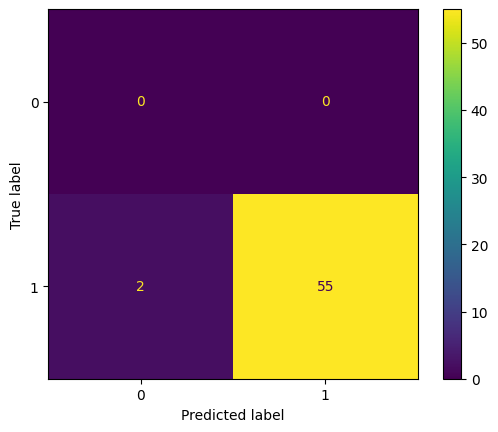

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming 'Y_test' and 'y_pred' are defined...
cm = confusion_matrix(Y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [75]:
Y_test = [1]*len(y_pred)

In [76]:
print (classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.96      0.98        57

    accuracy                           0.96        57
   macro avg       0.50      0.48      0.49        57
weighted avg       1.00      0.96      0.98        57



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


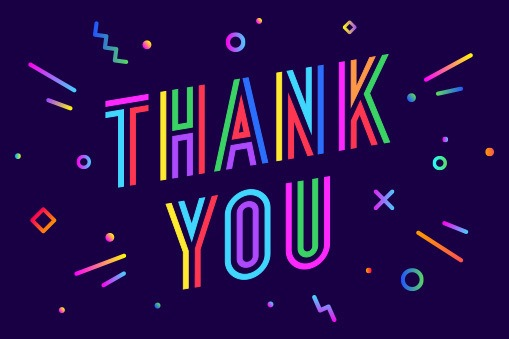